### Binarization

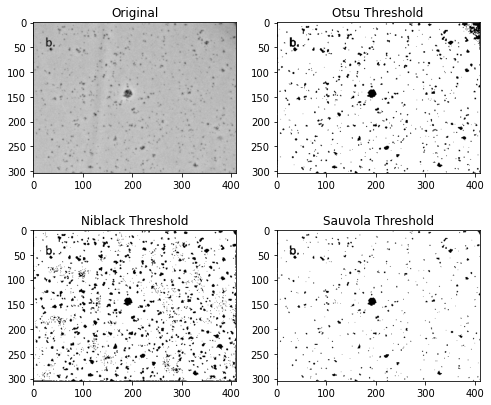

In [14]:
import matplotlib.pyplot as plt

from skimage.filters import (threshold_otsu, threshold_niblack, threshold_sauvola)
from skimage.io import imread

image = imread('sample_images/image-1b.png', as_gray=True)

binary_otsu = image > threshold_otsu(image)
binary_otsu = binary_otsu.astype(int)

window_size = 35

thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
binary_niblack = image > thresh_niblack
binary_niblack = binary_niblack.astype(int)

thresh_sauvola = threshold_sauvola(image, window_size=window_size)
binary_sauvola = image > thresh_sauvola
binary_sauvola = binary_sauvola.astype(int)


plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')

plt.subplot(2, 2, 2)
plt.title('Otsu Threshold')
plt.imshow(binary_otsu, cmap=plt.cm.gray, vmax=1, vmin=0)

plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray, vmax=1, vmin=0)
plt.title('Niblack Threshold')

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray, vmax=1, vmin=0)
plt.title('Sauvola Threshold')

plt.show()





### Microstructure characterization

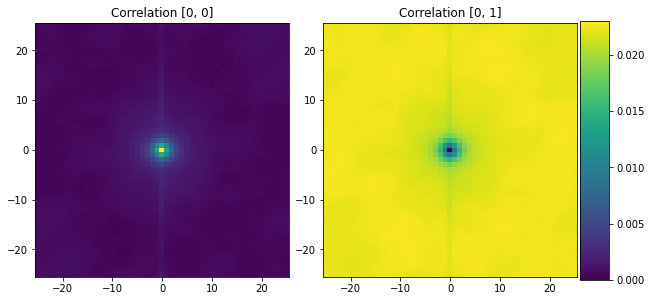

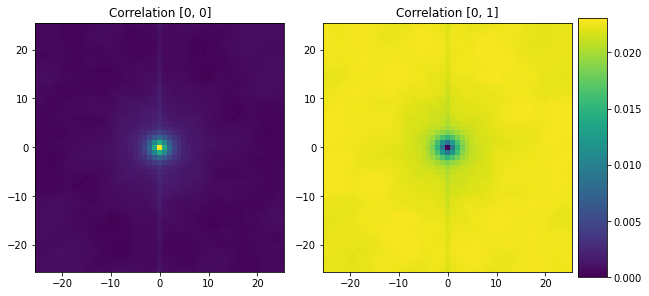

In [42]:
import numpy as np
from PIL import Image
from pymks import (
    generate_multiphase,
    plot_microstructures,
    PrimitiveTransformer,
    TwoPointCorrelation,
)

imarray = np.expand_dims(binary_sauvola, axis=0)
data = PrimitiveTransformer(n_state=2, min_=0.0, max_=1.0).transform(imarray)

auto_correlation = TwoPointCorrelation(
    periodic_boundary=True,
    cutoff=25,
    correlations=[(0,0),(0,1)] 
).transform(data)

plot_microstructures(
    auto_correlation[0, :, :, 0],
    auto_correlation[0, :, :, 1],
    titles=['Correlation [0, 0]', 'Correlation [0, 1]'],
    showticks=True
)

# ask umar what this plot means

## Request data to nanomine

In [47]:
import requests
import json
import pandas as pd

# placeholder data to make a query to graphql endpoint

query = """query {
    characters {
    results {
      name
      status
      species
      type
      gender
    }
  }
}"""

# note sperical particles 
# schema



url = 'https://rickandmortyapi.com/graphql/'
r = requests.post(url, json={'query': query})
json_data = json.loads(r.text)
df_data = json_data['data']['characters']['results']
df = pd.DataFrame(df_data)
print(df.head())



           name status species type  gender
0  Rick Sanchez  Alive   Human         Male
1   Morty Smith  Alive   Human         Male
2  Summer Smith  Alive   Human       Female
3    Beth Smith  Alive   Human       Female
4   Jerry Smith  Alive   Human         Male
